In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns 



In [76]:
data = pd.read_csv('Interest rate.csv')

In [63]:
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,7000.0,10,Rent,68000.0,2,car,18.37,0,NaN,9,14,0,1
1,10000002,30000.0,4,Mortgage,NaN,0,debt_consolidation,14.93,0,17.0,12,24,0,3
2,10000003,24725.0,7,Mortgage,75566.4,1,debt_consolidation,15.88,0,NaN,12,16,1,3
3,10000004,16000.0,10,no report,56160.0,1,debt_consolidation,14.34,3,NaN,16,22,1,3
4,10000005,17000.0,8,Own,96000.0,1,debt_consolidation,22.17,1,NaN,19,30,0,1


In [6]:
data.shape

(164309, 14)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164309 entries, 0 to 164308
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Loan_ID                  164309 non-null  int64  
 1   Loan_Amount_Requested    164309 non-null  object 
 2   Length_Employed          164309 non-null  object 
 3   Home_Owner               164309 non-null  object 
 4   Annual_Income            139207 non-null  float64
 5   Income_Verified          164309 non-null  object 
 6   Purpose_Of_Loan          164309 non-null  object 
 7   Debt_To_Income           164309 non-null  float64
 8   Inquiries_Last_6Mo       164309 non-null  int64  
 9   Months_Since_Deliquency  75930 non-null   float64
 10  Number_Open_Accounts     164309 non-null  int64  
 11  Total_Accounts           164309 non-null  int64  
 12  Gender                   164309 non-null  object 
 13  Interest_Rate            164309 non-null  int64  
dtypes: f

In [8]:
data.describe()

,Loan_ID,Annual_Income,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Interest_Rate
count,1.643090e+05,1.392070e+05,164309.000000,164309.000000,75930.000000,164309.000000,164309.000000,164309.000000
mean,1.008216e+07,7.333116e+04,17.207189,0.781698,34.229356,11.193818,25.067665,2.158951
std,4.743207e+04,6.037750e+04,7.845083,1.034747,21.761180,4.991813,11.583067,0.738364
min,1.000000e+07,4.000000e+03,0.000000,0.000000,0.000000,0.000000,2.000000,1.000000
25%,1.004108e+07,4.500000e+04,11.370000,0.000000,16.000000,8.000000,17.000000,2.000000
50%,1.008216e+07,6.300000e+04,16.840000,0.000000,31.000000,10.000000,23.000000,2.000000
75%,1.012323e+07,8.869750e+04,22.780000,1.000000,50.000000,14.000000,32.000000,3.000000
max,1.016431e+07,7.500000e+06,39.990000,8.000000,180.000000,76.000000,156.000000,3.000000


In [9]:
data['Length_Employed'].unique()

array(['< 1 year', '4 years', '7 years', '8 years', '2 years',
       '10+ years', '1 year', nan, '6 years', '9 years', '3 years',
       '5 years'], dtype=object)

In [77]:
data['Length_Employed'].fillna('no report',inplace=True)

In [24]:
data['Home_Owner'].unique()

array(['Rent', 'Mortgage', 'no report', 'Own', 'Other', 'None'],
      dtype=object)

In [15]:
from sklearn.impute import KNNImputer

In [16]:
imputer = KNNImputer(n_neighbors=5)

In [78]:
data['Home_Owner'].fillna('no report',inplace=True)

In [21]:
from sklearn.preprocessing import LabelEncoder
en = LabelEncoder()

In [54]:
data1 = data.dropna()

In [55]:
data1["Length_Employed"] = en.fit_transform(data1['Length_Employed'])
data1["Income_Verified"] = en.fit_transform(data1['Income_Verified'])
data1["Gender"] = en.fit_transform(data1['Gender'])

one_hot_features = ['Home_Owner','Purpose_Of_Loan']
one_hot_encoded = pd.get_dummies(data1[one_hot_features])

data1 = data1.drop(one_hot_features, axis=1)


data1 = pd.concat([data1, one_hot_encoded], axis=1)
data1.head()

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

In [69]:
data["Length_Employed"] = en.fit_transform(data['Length_Employed'])
data["Income_Verified"] = en.fit_transform(data['Income_Verified'])
data["Gender"] = en.fit_transform(data['Gender'])

one_hot_features = ['Home_Owner','Purpose_Of_Loan']
one_hot_encoded = pd.get_dummies(data[one_hot_features])

data = data.drop(one_hot_features, axis=1)


data = pd.concat([data, one_hot_encoded], axis=1)
data.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,...,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,10000001,7000.0,10,68000.0,2,18.37,0,NaN,9,14,...,0,0,0,0,0,0,0,0,0,0
1,10000002,30000.0,4,NaN,0,14.93,0,17.0,12,24,...,0,0,0,0,0,0,0,0,0,0
2,10000003,24725.0,7,75566.4,1,15.88,0,NaN,12,16,...,0,0,0,0,0,0,0,0,0,0
3,10000004,16000.0,10,56160.0,1,14.34,3,NaN,16,22,...,0,0,0,0,0,0,0,0,0,0
4,10000005,17000.0,8,96000.0,1,22.17,1,NaN,19,30,...,0,0,0,0,0,0,0,0,0,0


In [70]:
data.drop('Loan_ID',axis=1,inplace=True)

In [57]:
data1.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,...,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
7,10000008,15000.0,10,115000.0,0,7.97,1,16.0,25,31,...,0,0,0,0,0,0,0,0,0,0
12,10000013,7200.0,1,55000.0,1,31.25,0,68.0,5,16,...,0,0,0,0,0,0,0,0,0,0
14,10000015,6700.0,1,16000.0,1,14.70,0,13.0,20,43,...,0,0,0,0,0,0,0,0,0,0
18,10000019,25000.0,1,62000.0,0,13.72,0,64.0,6,26,...,0,0,0,0,0,0,0,0,0,0
20,10000021,4000.0,1,55000.0,2,23.04,0,10.0,15,21,...,0,0,0,0,0,0,0,0,0,0


In [64]:
data1.reset_index(inplace=True)
data1.drop('index',axis=1,inplace=True)

In [58]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()

In [59]:
data1.drop('Loan_ID',axis=1,inplace=True)

In [61]:
columns = ['Annual_Income','Months_Since_Deliquency']
data1_train = data1.drop(columns,axis=1)
data1_test = data1.loc[:,columns]

In [71]:
knn.fit(data1_train,data1['Months_Since_Deliquency'])
for i in range(len(data['Months_Since_Deliquency'])):
    if(np.isnan(data.loc[i,'Months_Since_Deliquency'])):
        data.loc[i,'Months_Since_Deliquency'] = knn.predict(data[i:i+1].drop(columns,axis=1))[0]

In [72]:
knn.fit(data1_train,data1['Annual_Income'])
for i in range(len(data['Annual_Income'])):
    if(np.isnan(data.loc[i,'Annual_Income'])):
        data.loc[i,'Annual_Income'] = knn.predict(data[i:i+1].drop(columns,axis=1))[0]

In [67]:
data1.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,...,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,15000.0,10,115000.0,0,7.97,1,16.0,25,31,0,...,0,0,0,0,0,0,0,0,0,0
1,7200.0,1,55000.0,1,31.25,0,68.0,5,16,1,...,0,0,0,0,0,0,0,0,0,0
2,6700.0,1,16000.0,1,14.70,0,13.0,20,43,1,...,0,0,0,0,0,0,0,0,0,0
3,25000.0,1,62000.0,0,13.72,0,64.0,6,26,0,...,0,0,0,0,0,0,0,0,0,0
4,4000.0,1,55000.0,2,23.04,0,10.0,15,21,0,...,0,0,0,0,0,0,0,0,0,0


In [73]:
data.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,...,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,7000.0,10,68000.0,2,18.37,0,41.4,9,14,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,4,134966.6,0,14.93,0,17.0,12,24,0,...,0,0,0,0,0,0,0,0,0,0
2,24725.0,7,75566.4,1,15.88,0,26.6,12,16,1,...,0,0,0,0,0,0,0,0,0,0
3,16000.0,10,56160.0,1,14.34,3,40.6,16,22,1,...,0,0,0,0,0,0,0,0,0,0
4,17000.0,8,96000.0,1,22.17,1,30.2,19,30,0,...,0,0,0,0,0,0,0,0,0,0


In [74]:
data1 = data

In [75]:
data1.to_csv('Temp.csv')

In [79]:
data.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

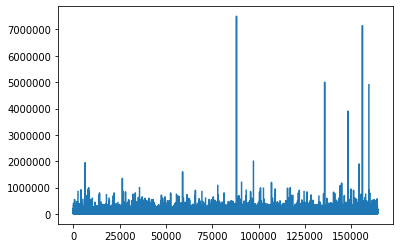

In [80]:
data['Annual_Income'].plot()

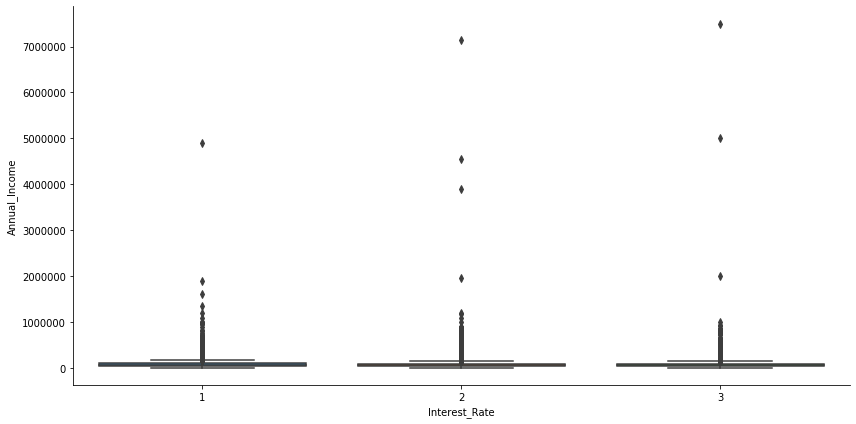

In [82]:
sns.catplot(x = 'Interest_Rate' , y = 'Annual_Income', kind = "box", data = data ,height = 6 , aspect = 2)

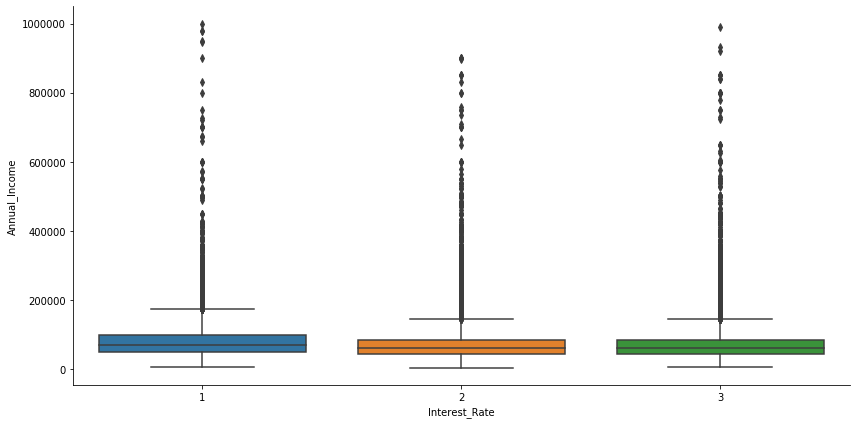

In [83]:
sns.catplot(x = 'Interest_Rate' , y = 'Annual_Income', kind = "box", data = data[data['Annual_Income'] < 1000000] ,height = 6 , aspect = 2)

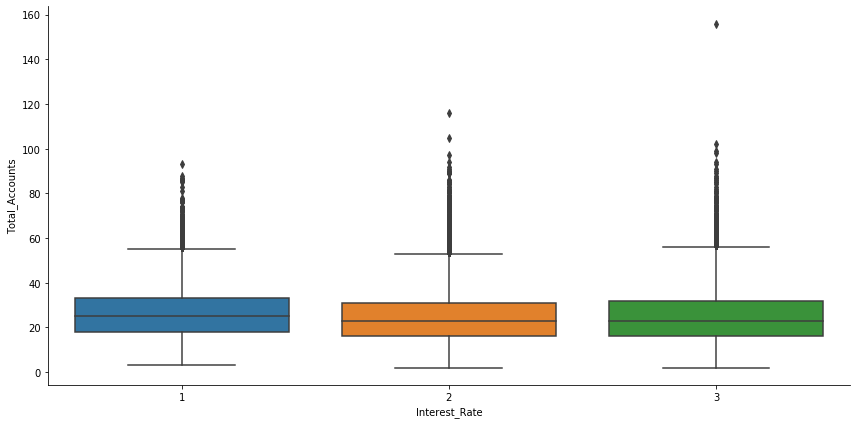

In [85]:
sns.catplot(x = 'Interest_Rate' , y = 'Total_Accounts', kind = "box", data = data ,height = 6 , aspect = 2)

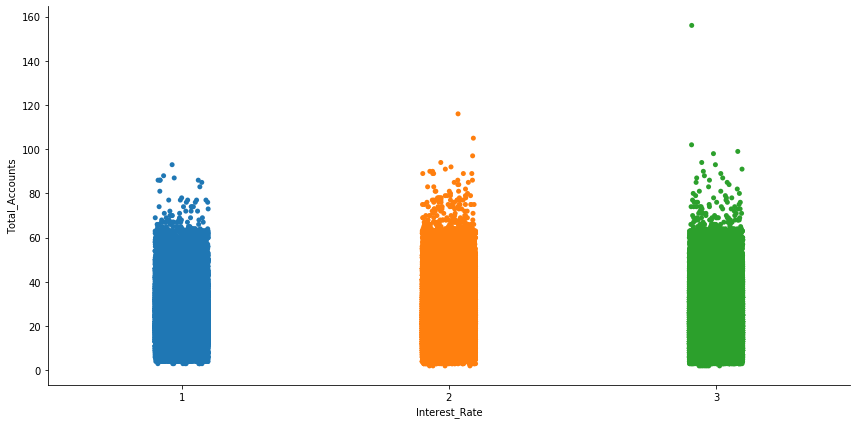

In [87]:
sns.catplot(x = 'Interest_Rate' , y = 'Total_Accounts', data = data ,height = 6 , aspect = 2)

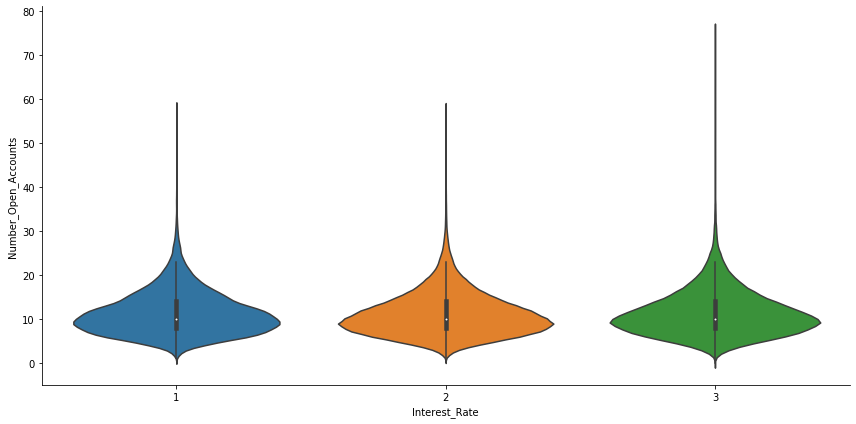

In [91]:
sns.catplot(x = 'Interest_Rate' , y = 'Number_Open_Accounts',kind = "violin", data = data ,height = 6 , aspect = 2)

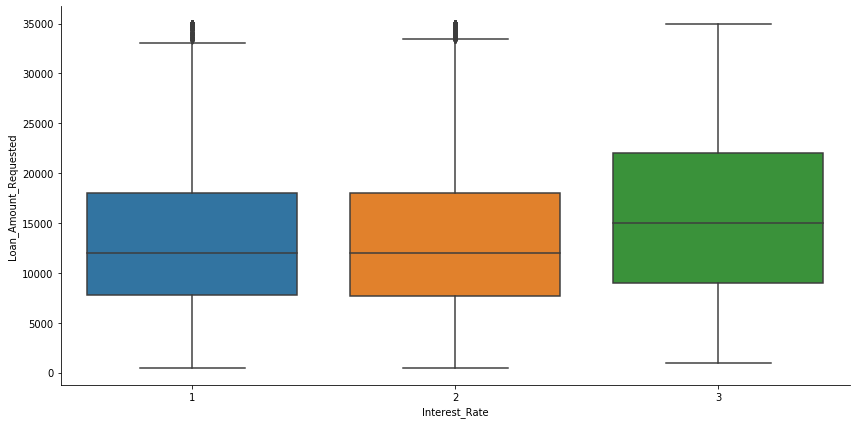

In [95]:
sns.catplot(x = 'Interest_Rate' , y = 'Loan_Amount_Requested',kind = "box", data = data1 ,height = 6 , aspect = 2)

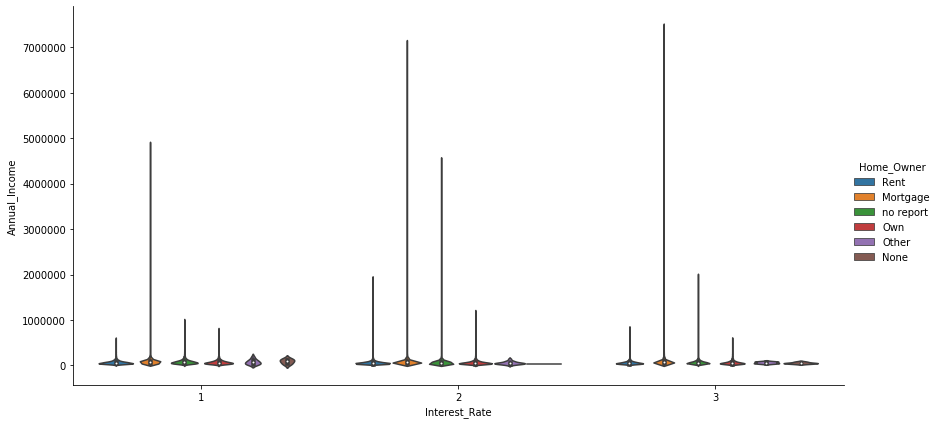

In [103]:
sns.catplot(x = 'Interest_Rate' , y = 'Annual_Income',hue ='Home_Owner',kind = "violin", data = data ,height = 6 , aspect = 2)

In [98]:
data.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [104]:
data1.columns

Index(['Loan_Amount_Requested', 'Length_Employed', 'Annual_Income',
       'Income_Verified', 'Debt_To_Income', 'Inquiries_Last_6Mo',
       'Months_Since_Deliquency', 'Number_Open_Accounts', 'Total_Accounts',
       'Gender', 'Interest_Rate', 'Home_Owner_Mortgage', 'Home_Owner_None',
       'Home_Owner_Other', 'Home_Owner_Own', 'Home_Owner_Rent',
       'Home_Owner_no report', 'Purpose_Of_Loan_car',
       'Purpose_Of_Loan_credit_card', 'Purpose_Of_Loan_debt_consolidation',
       'Purpose_Of_Loan_educational', 'Purpose_Of_Loan_home_improvement',
       'Purpose_Of_Loan_house', 'Purpose_Of_Loan_major_purchase',
       'Purpose_Of_Loan_medical', 'Purpose_Of_Loan_moving',
       'Purpose_Of_Loan_other', 'Purpose_Of_Loan_renewable_energy',
       'Purpose_Of_Loan_small_business', 'Purpose_Of_Loan_vacation',
       'Purpose_Of_Loan_wedding'],
      dtype='object')

In [107]:
data['Loan_Amount_Requested'] = data1['Loan_Amount_Requested']

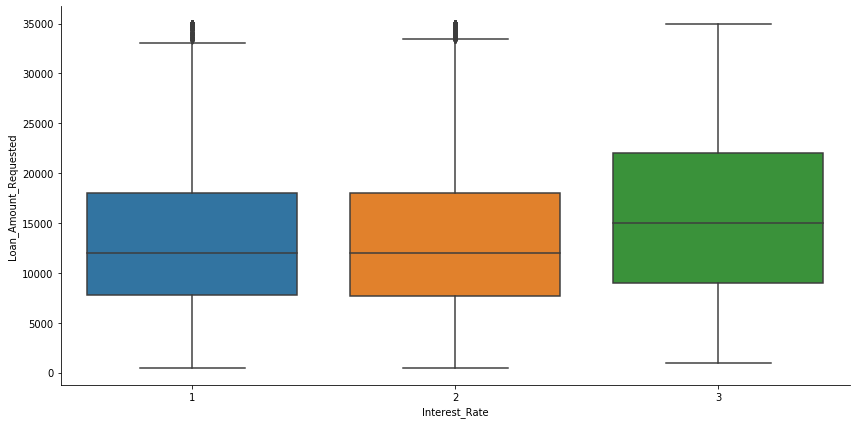

In [135]:
sns.catplot(x = 'Interest_Rate' , y = 'Loan_Amount_Requested',kind = "box", data = data ,height = 6 , aspect = 2)

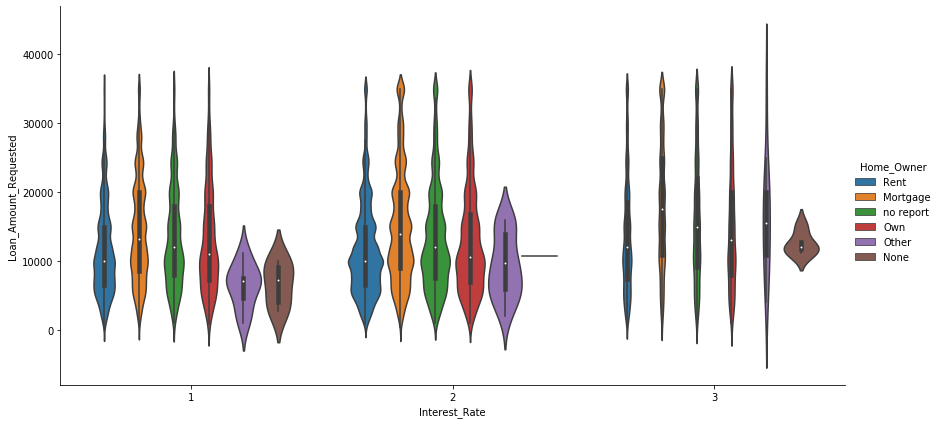

In [138]:
sns.catplot(x = 'Interest_Rate' , y = 'Loan_Amount_Requested',hue ='Home_Owner',kind = "violin", data = data ,height = 6 , aspect = 2)

In [142]:
data.groupby(['Interest_Rate','Home_Owner']).count()['Annual_Income']

Interest_Rate  Home_Owner
1              Mortgage      13836
               None              5
               Other             9
               Own            2098
               Rent           8314
               no report      4385
2              Mortgage      25158
               None              1
               Other            17
               Own            4553
               Rent          20956
               no report      9175
3              Mortgage      20579
               None              4
               Other            13
               Own            3943
               Rent          18283
               no report      7878
Name: Annual_Income, dtype: int64

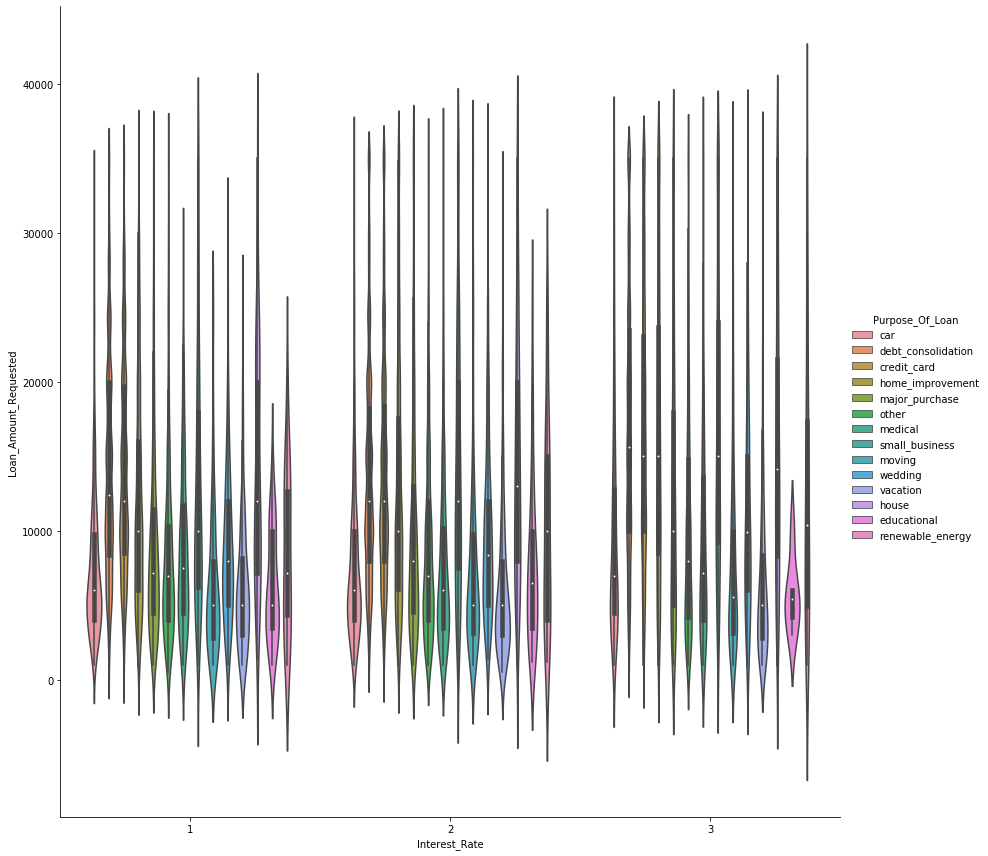

In [113]:
sns.catplot(x = 'Interest_Rate' , y = 'Loan_Amount_Requested',hue ='Purpose_Of_Loan',kind = "violin", data = data ,height = 12 , aspect = 1)

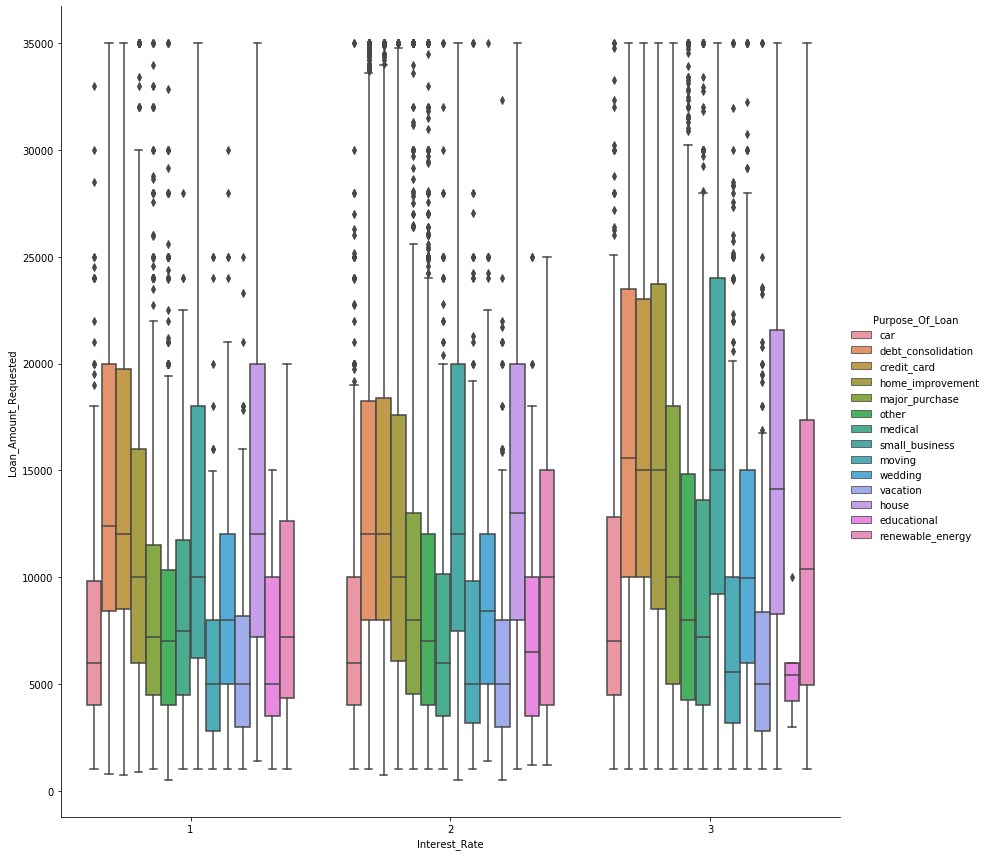

In [114]:
sns.catplot(x = 'Interest_Rate' , y = 'Loan_Amount_Requested',hue ='Purpose_Of_Loan',kind = "box", data = data ,height = 12 , aspect = 1)

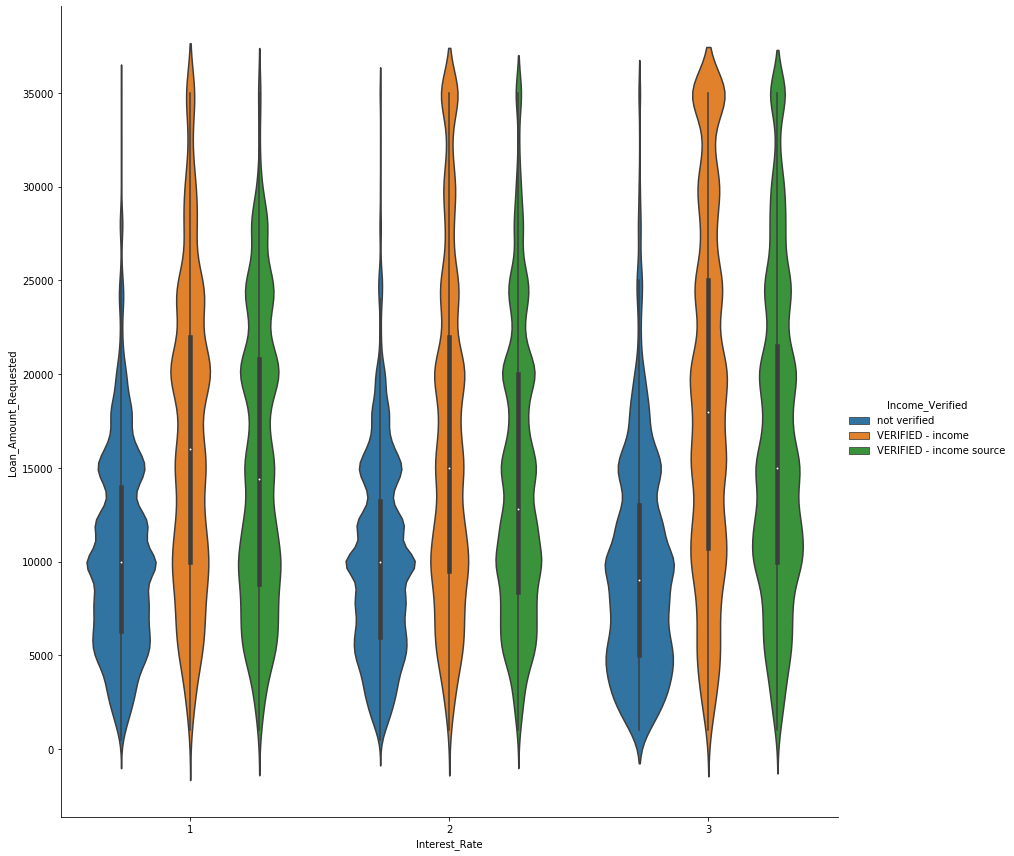

In [115]:
sns.catplot(x = 'Interest_Rate' , y = 'Loan_Amount_Requested',hue ='Income_Verified',kind = "violin", data = data ,height = 12 , aspect = 1)

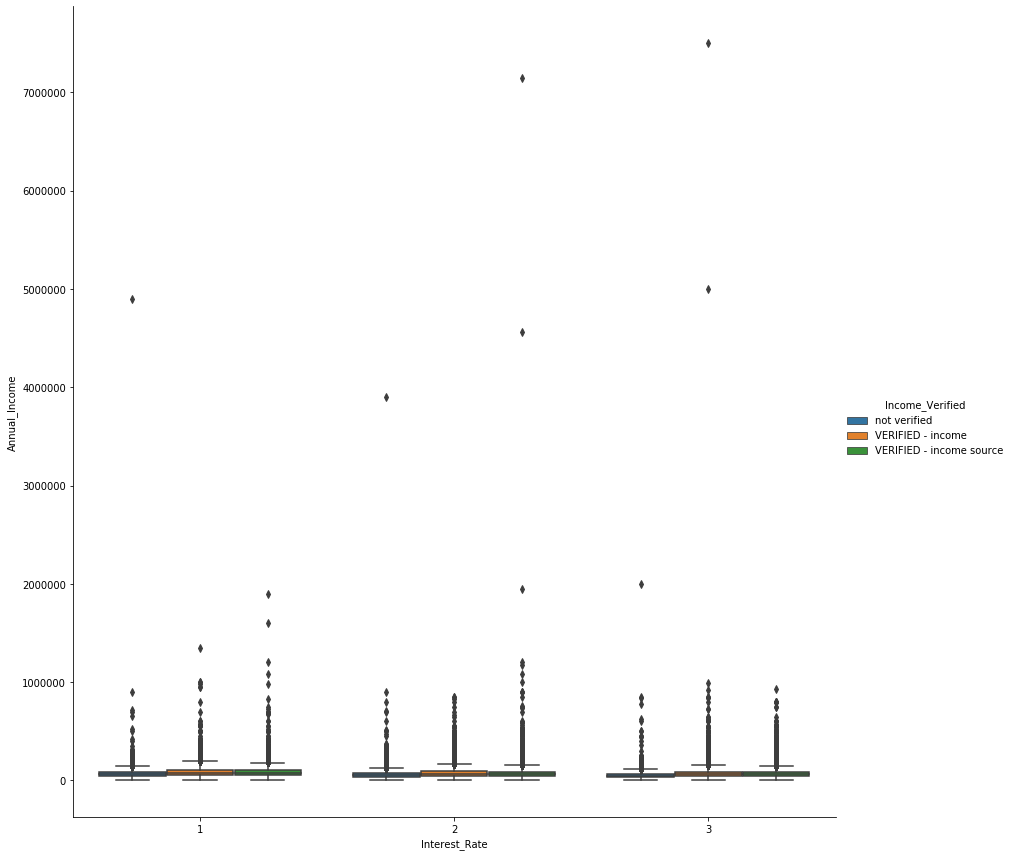

In [117]:
sns.catplot(x = 'Interest_Rate' , y = 'Annual_Income',hue ='Income_Verified',kind = "box", data = data ,height = 12 , aspect = 1)

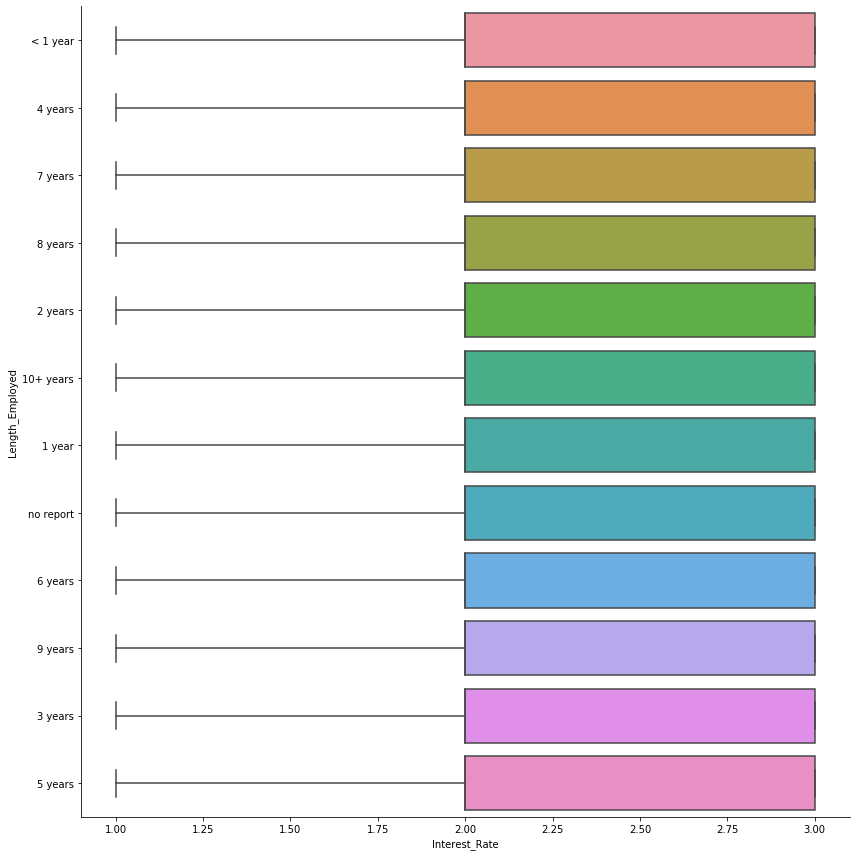

In [119]:
sns.catplot(x = 'Interest_Rate' , y = 'Length_Employed',kind = "box", data = data ,height = 12 , aspect = 1)

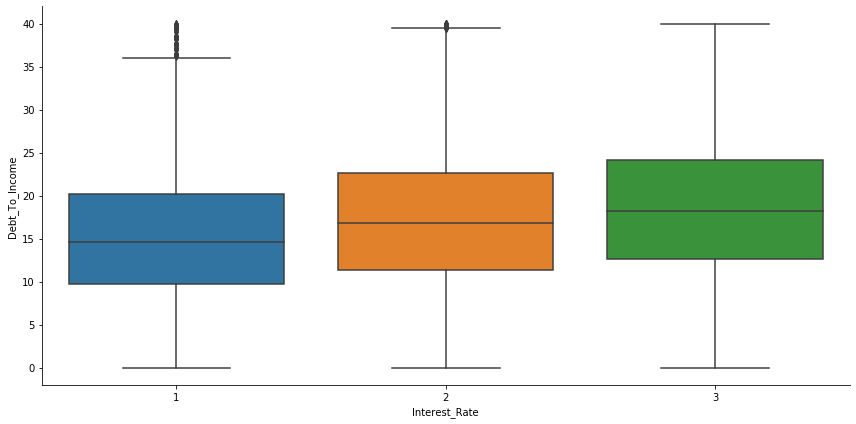

In [121]:
sns.catplot(x = 'Interest_Rate' , y = 'Debt_To_Income',kind = "box", data = data ,height = 6 , aspect = 2)

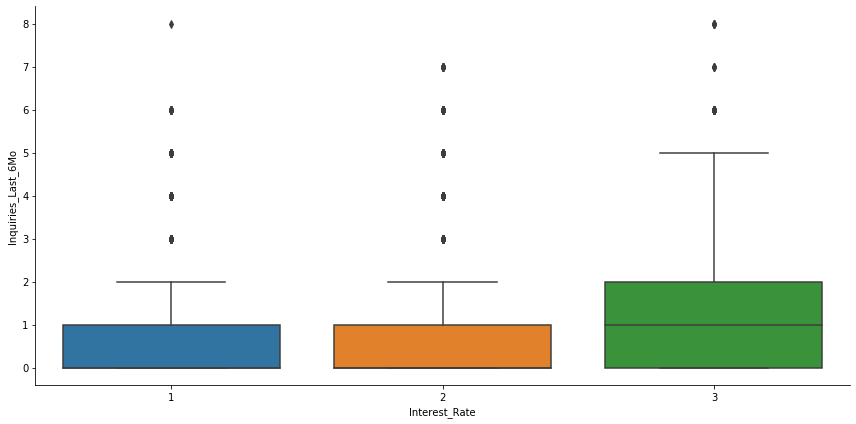

In [124]:
sns.catplot(x = 'Interest_Rate' , y = 'Inquiries_Last_6Mo',kind = "box", data = data ,height = 6 , aspect = 2)

In [125]:
data.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

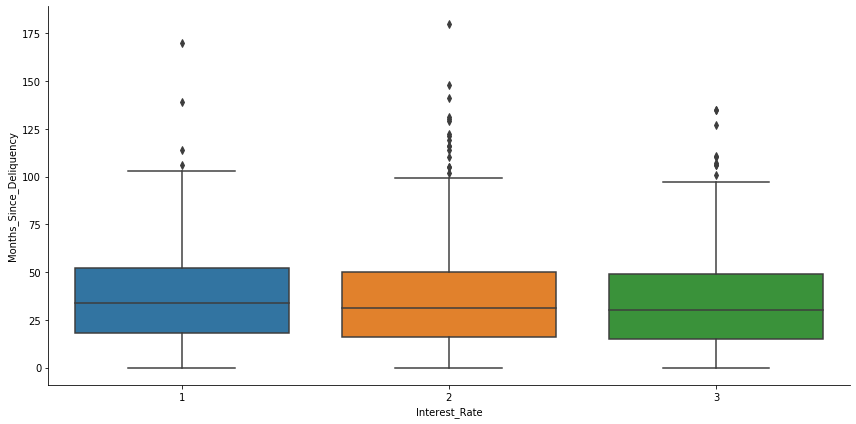

In [126]:
sns.catplot(x = 'Interest_Rate' , y = 'Months_Since_Deliquency',kind = "box", data = data ,height = 6 , aspect = 2)

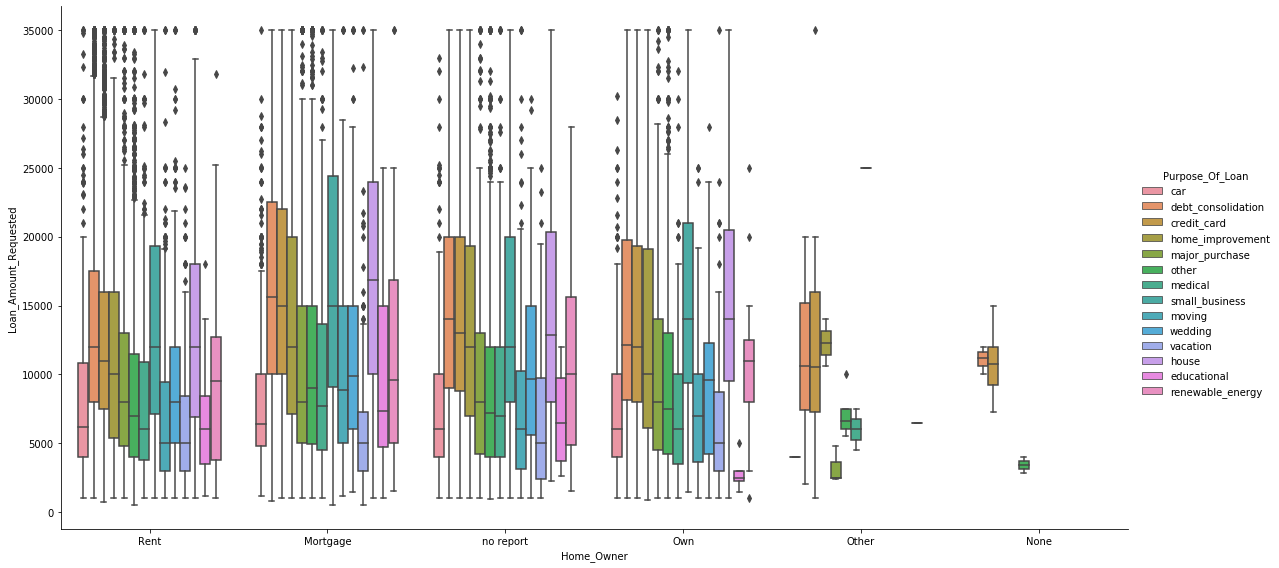

In [129]:
sns.catplot(x = 'Home_Owner' , y = 'Loan_Amount_Requested',hue ='Purpose_Of_Loan',kind = "box", data = data ,height = 8 , aspect = 2)

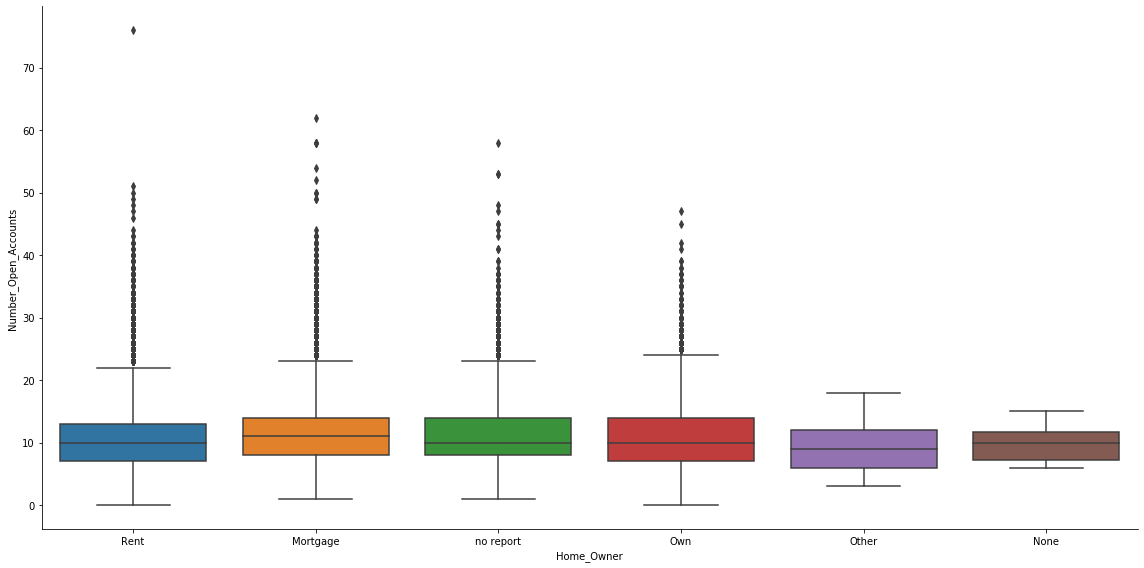

In [130]:
sns.catplot(x = 'Home_Owner' , y = 'Number_Open_Accounts',kind = "box", data = data ,height = 8 , aspect = 2)

In [131]:
#Feature Engineering

In [132]:
data1.head()

,Loan_Amount_Requested,Length_Employed,Annual_Income,Income_Verified,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,...,Purpose_Of_Loan_home_improvement,Purpose_Of_Loan_house,Purpose_Of_Loan_major_purchase,Purpose_Of_Loan_medical,Purpose_Of_Loan_moving,Purpose_Of_Loan_other,Purpose_Of_Loan_renewable_energy,Purpose_Of_Loan_small_business,Purpose_Of_Loan_vacation,Purpose_Of_Loan_wedding
0,7000.0,10,68000.0,2,18.37,0,41.4,9,14,0,...,0,0,0,0,0,0,0,0,0,0
1,30000.0,4,134966.6,0,14.93,0,17.0,12,24,0,...,0,0,0,0,0,0,0,0,0,0
2,24725.0,7,75566.4,1,15.88,0,26.6,12,16,1,...,0,0,0,0,0,0,0,0,0,0
3,16000.0,10,56160.0,1,14.34,3,40.6,16,22,1,...,0,0,0,0,0,0,0,0,0,0
4,17000.0,8,96000.0,1,22.17,1,30.2,19,30,0,...,0,0,0,0,0,0,0,0,0,0


In [133]:
data.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

In [136]:
data1.drop('Length_Employed',axis=1,inplace=True)

In [143]:
data1['Loan%'] = data1['Annual_Income']/data1['Loan_Amount_Requested']

In [144]:
data1.columns

Index(['Loan_Amount_Requested', 'Annual_Income', 'Income_Verified',
       'Debt_To_Income', 'Inquiries_Last_6Mo', 'Months_Since_Deliquency',
       'Number_Open_Accounts', 'Total_Accounts', 'Gender', 'Interest_Rate',
       'Home_Owner_Mortgage', 'Home_Owner_None', 'Home_Owner_Other',
       'Home_Owner_Own', 'Home_Owner_Rent', 'Home_Owner_no report',
       'Purpose_Of_Loan_car', 'Purpose_Of_Loan_credit_card',
       'Purpose_Of_Loan_debt_consolidation', 'Purpose_Of_Loan_educational',
       'Purpose_Of_Loan_home_improvement', 'Purpose_Of_Loan_house',
       'Purpose_Of_Loan_major_purchase', 'Purpose_Of_Loan_medical',
       'Purpose_Of_Loan_moving', 'Purpose_Of_Loan_other',
       'Purpose_Of_Loan_renewable_energy', 'Purpose_Of_Loan_small_business',
       'Purpose_Of_Loan_vacation', 'Purpose_Of_Loan_wedding', 'Loan%'],
      dtype='object')

In [147]:
from sklearn.model_selection import train_test_split

In [348]:
training, testing = train_test_split(data1, test_size=0.25, random_state=0)
print("Total sample size = %i; training sample size = %i, testing sample size = %i"\
     %(data1.shape[0],training.shape[0],testing.shape[0]))

Total sample size = 164309; training sample size = 123231, testing sample size = 41078


In [226]:
training1 = training[training['Interest_Rate'] == 1]
training2 = training[training['Interest_Rate'] == 2]
training3 = training[training['Interest_Rate'] == 3]

In [227]:
training1.reset_index(inplace=True)
training1.drop('index',axis=1,inplace=True)
training2.reset_index(inplace=True)
training2.drop('index',axis=1,inplace=True)
training3.reset_index(inplace=True)
training3.drop('index',axis=1,inplace=True)

C:\Users\KIIT\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [160]:
from sklearn.cluster import KMeans

In [163]:
km = KMeans(n_clusters=3)
km.fit(training2)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [234]:
df = pd.DataFrame()

In [168]:
df['label']= km.labels_
df['label'].value_counts()

0    46599
1     9932
2        3
Name: label, dtype: int64

In [229]:
training2['label'] = km.labels_

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [230]:
d0 = training2[training2['label']==0]
d1 = training2[training2['label']==1]
t = d0[:18000].append(d1[:9000])

In [232]:
training2 = t

In [240]:
training2.drop('label',axis=1,inplace=True)

In [242]:
km = KMeans(n_clusters=3)
km.fit(training3)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [243]:
df['label']= km.labels_
df['label'].value_counts()

0    41203
1     6640
2        1
Name: label, dtype: int64

In [244]:
training3['label'] = km.labels_

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [246]:
b0 = training3[training3['label']==0]
b1 = training3[training3['label']==1]
t = b0[:22000].append(b1[:6000])

In [248]:
training3 = t
training3.drop('label',axis=1,inplace=True)

In [252]:
training = training1.append([training2,training3])

In [349]:
df_train_s = training.loc[:,data1.columns]
X_train = df_train_s.drop(['Interest_Rate'], axis=1)
Y_train = df_train_s.loc[:, ['Interest_Rate']]

df_test_s = testing.loc[:,data1.columns]
X_test = df_test_s.drop(['Interest_Rate'], axis=1)
Y_test = df_test_s.loc[:, ['Interest_Rate']]

In [253]:
training.groupby('Interest_Rate').count()['Annual_Income']

Interest_Rate
1    27069
2    27000
3    28000
Name: Annual_Income, dtype: int64

In [145]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import pylab

In [146]:
def masterplot(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col])
    
def log_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.log(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.log(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.log(data[col]))
    
def reciprocal_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(1/data[col])
    
    plt.subplot(1,3,2)
    stats.probplot(1/data[col],dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=1/data[col])
    

def squareroot_master(data,col):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(np.sqrt(data[col]))
    
    plt.subplot(1,3,2)
    stats.probplot(np.sqrt(data[col]),dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=np.sqrt(data[col]))
    

def exponential_master(data,col,e):
    plt.figure(figsize=(20,5))
    plt.subplot(1,3,1)
    sns.distplot(data[col]**e)
    
    plt.subplot(1,3,2)
    stats.probplot(data[col]**e,dist='norm',plot=pylab)
    
    plt.subplot(1,3,3)
    sns.boxplot(y=data[col]**e)
    
def boxcox_master(data, col):
    plt.figure(figsize=(16, 4))
    plt.tight_layout()

    z,param=stats.boxcox(data[col])
    
    plt.subplot(1, 3, 1)
    sns.distplot(z, bins=30)
    plt.title('Box-Cox Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(z, dist="norm", plot=pylab)
    plt.ylabel('Box-Cox RM quantiles')

    plt.subplot(1, 3, 3)
    sns.boxplot(y=z)
    plt.title('Box-Cox Boxplot')


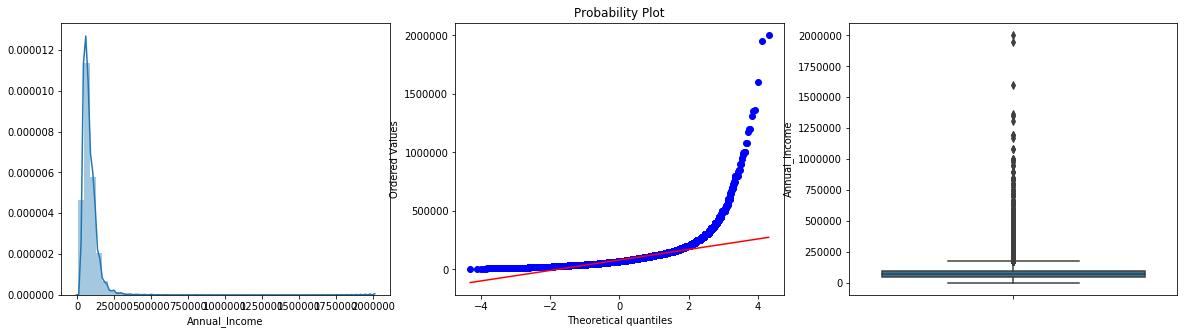

In [255]:
masterplot(X_train,'Annual_Income')

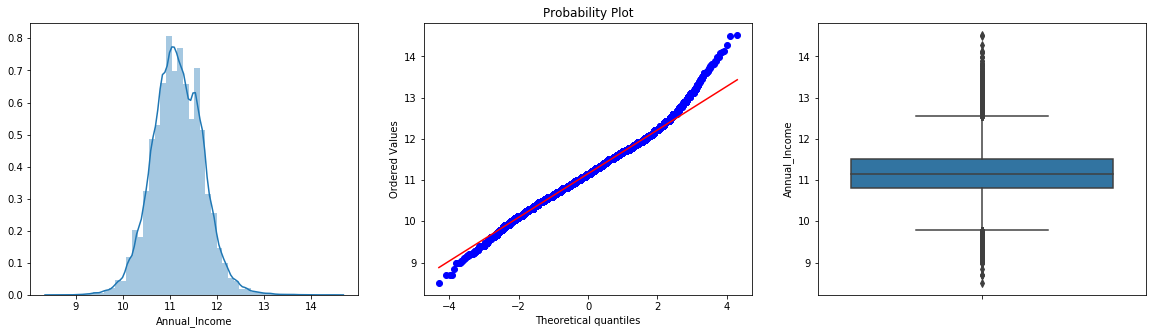

In [256]:
log_master(X_train,'Annual_Income')

In [350]:
X_train['Annual_Income'] = np.log(X_train['Annual_Income'])
X_test['Annual_Income'] = np.log(X_test['Annual_Income'])

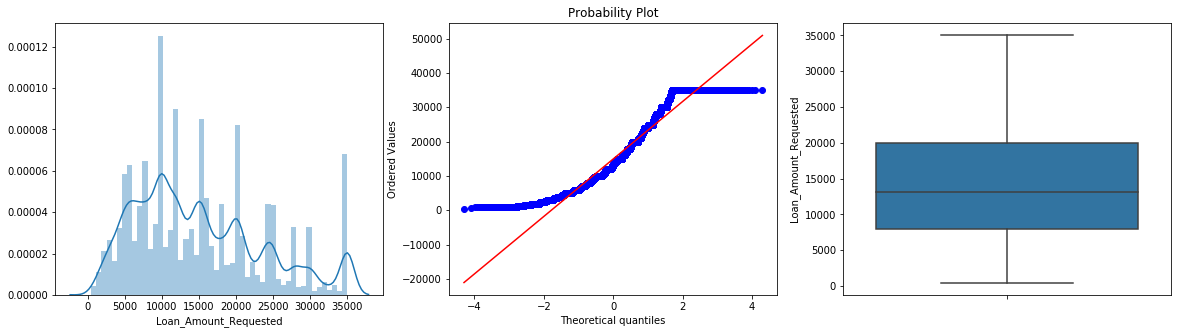

In [258]:
masterplot(X_train,'Loan_Amount_Requested')

In [308]:
for i in range(len(X_train['Annual_Income'])
              X_train.loc[i,'Loan_Amount_Requested'] = int(X_train.loc[i,'Loan_Amount_Requested'])
for i in range(len(X_test['Annual_Income'])
              X_test.loc[i,'Loan_Amount_Requested'] = int(X_test.loc[i,'Loan_Amount_Requested'])

SyntaxError: invalid syntax (<ipython-input-308-1d578c0a0f61>, line 2)

In [354]:
for i in range(len(X_train['Annual_Income'])):
    X_train.loc[i,'Loan_Amount_Requested'] = int(X_train.loc[i,'Loan_Amount_Requested']/5000)

In [355]:
for i in range(len(X_test['Annual_Income'])):
    X_test.loc[i,'Loan_Amount_Requested'] = int(X_test.loc[i,'Loan_Amount_Requested']/5000)

In [352]:
X_train.reset_index(inplace=True)
X_train.drop('index',axis=1,inplace=True)

In [353]:
X_test.reset_index(inplace=True)
X_test.drop('index',axis=1,inplace=True)

In [260]:
data.columns

Index(['Loan_ID', 'Loan_Amount_Requested', 'Length_Employed', 'Home_Owner',
       'Annual_Income', 'Income_Verified', 'Purpose_Of_Loan', 'Debt_To_Income',
       'Inquiries_Last_6Mo', 'Months_Since_Deliquency', 'Number_Open_Accounts',
       'Total_Accounts', 'Gender', 'Interest_Rate'],
      dtype='object')

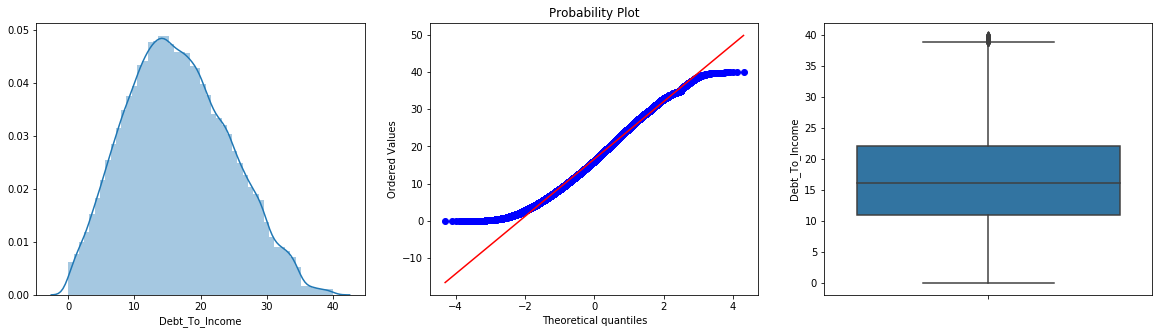

In [261]:
masterplot(X_train,'Debt_To_Income')

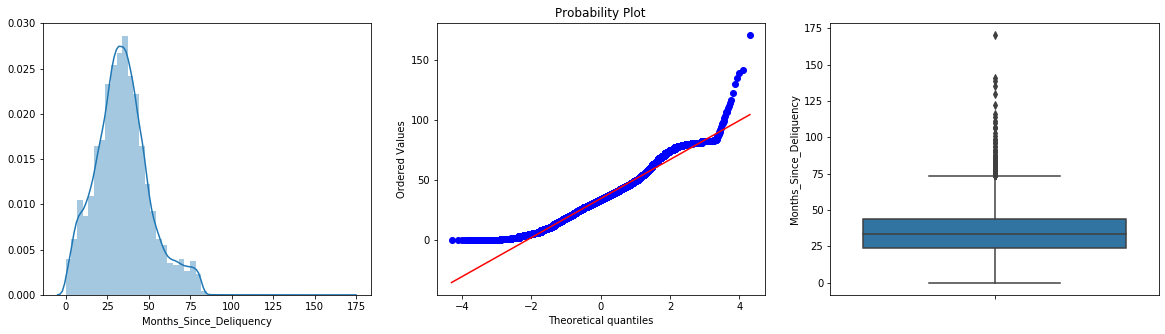

In [296]:
masterplot(X_train,'Months_Since_Deliquency')

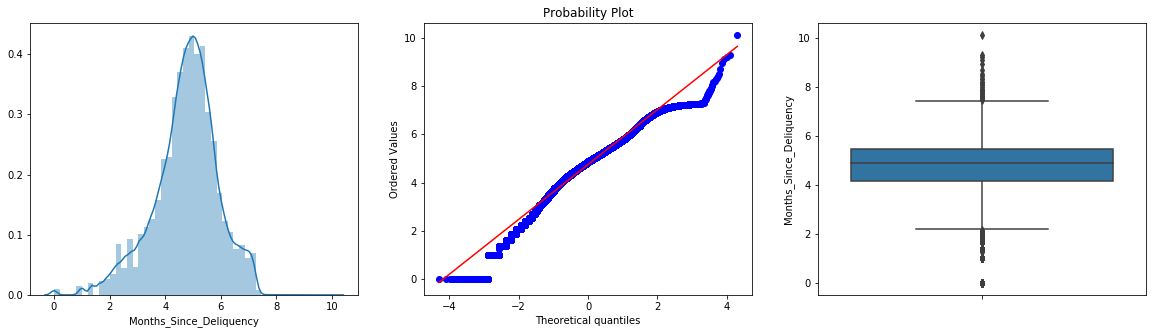

In [315]:
exponential_master(X_train,'Months_Since_Deliquency',0.45)

In [356]:
X_train['Months_Since_Deliquency'] = X_train['Months_Since_Deliquency']**0.45
X_test['Months_Since_Deliquency'] = X_test['Months_Since_Deliquency']**0.45

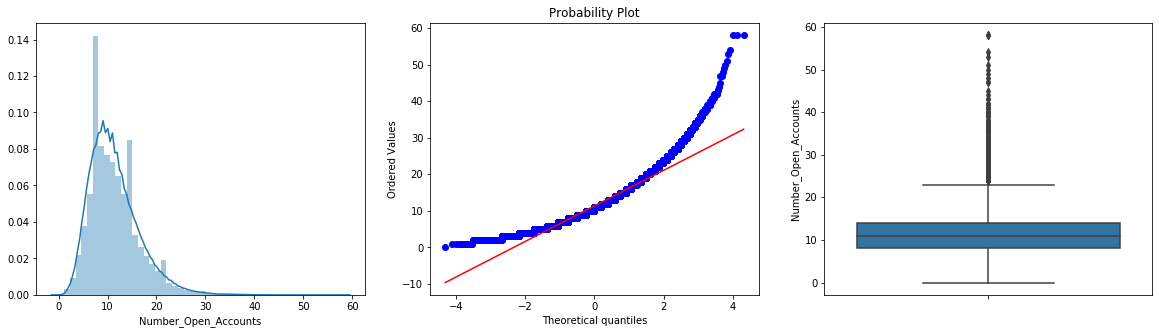

In [317]:
masterplot(X_train,'Number_Open_Accounts')

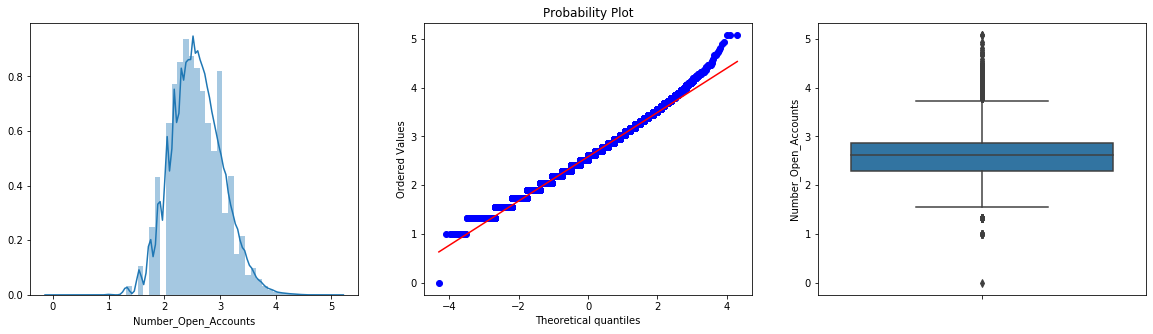

In [320]:
exponential_master(X_train,'Number_Open_Accounts',0.40)

In [357]:
X_train['Number_Open_Accounts'] = X_train['Number_Open_Accounts']**0.4
X_test['Number_Open_Accounts'] = X_test['Number_Open_Accounts']**0.4

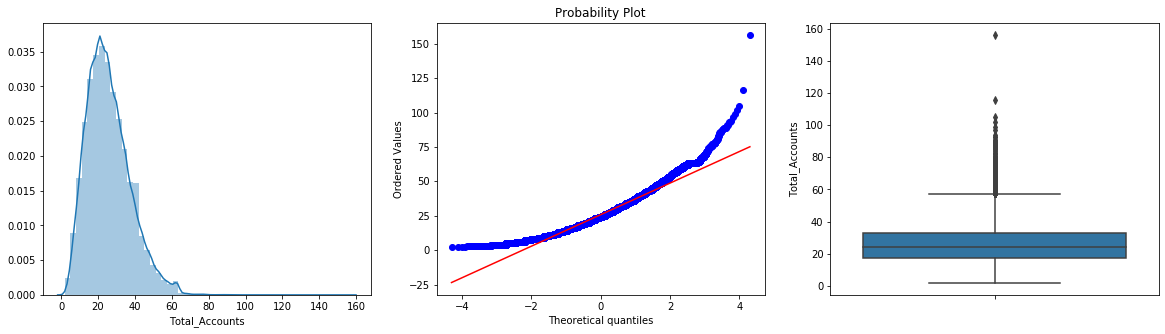

In [322]:
masterplot(X_train,'Total_Accounts')

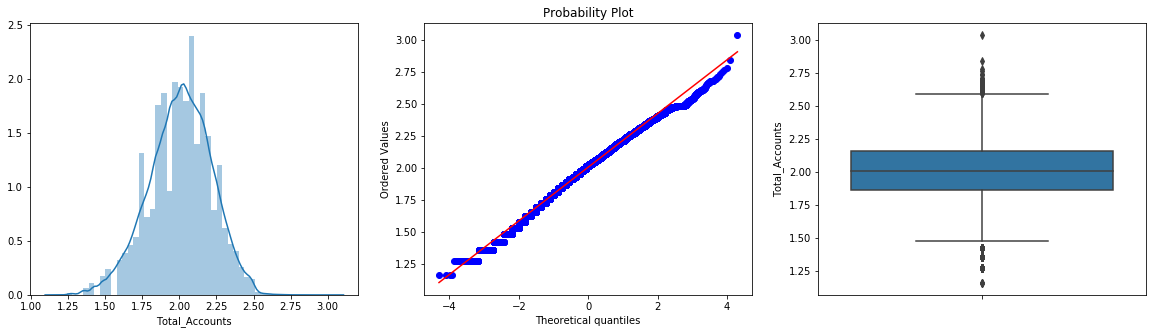

In [334]:
exponential_master(X_train,'Total_Accounts',0.22)

In [358]:
X_train['Total_Accounts'] = X_train['Total_Accounts']**0.22
X_test['Total_Accounts'] = X_test['Total_Accounts']**0.22

In [264]:
# model development

In [265]:
from sklearn.linear_model import LogisticRegression

In [337]:
l = LogisticRegression()
l.fit(X_train,Y_train)


C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [338]:
l_pred = l.predict(X_test)

In [268]:
from sklearn.metrics import classification_report

In [339]:
print(classification_report(Y_test,l_pred))

              precision    recall  f1-score   support

           1       0.33      0.61      0.43      6737
           2       0.48      0.21      0.29     14046
           3       0.53      0.63      0.57     12079

    accuracy                           0.44     32862
   macro avg       0.45      0.48      0.43     32862
weighted avg       0.47      0.44      0.42     32862



In [275]:
from sklearn.ensemble import RandomForestClassifier

In [359]:
forest = RandomForestClassifier()
forest.fit(X_train,Y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [363]:
f_pred = forest.predict(X_test)

In [364]:
print(classification_report(Y_test,f_pred))

              precision    recall  f1-score   support

           1       0.46      0.23      0.31      8474
           2       0.49      0.61      0.54     17549
           3       0.56      0.55      0.55     15055

    accuracy                           0.51     41078
   macro avg       0.50      0.46      0.47     41078
weighted avg       0.51      0.51      0.50     41078



In [279]:
from sklearn.metrics import f1_score

In [365]:
f1_score(Y_test,f_pred,average="weighted")

0.49744425992151936

In [288]:
from sklearn.ensemble import GradientBoostingClassifier

In [366]:
gb = GradientBoostingClassifier()
gb.fit(X_train,Y_train)

C:\Users\KIIT\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [367]:
g_pred = gb.predict(X_test)

In [368]:
print(classification_report(Y_test,g_pred))

              precision    recall  f1-score   support

           1       0.56      0.16      0.25      8474
           2       0.49      0.68      0.57     17549
           3       0.59      0.56      0.57     15055

    accuracy                           0.53     41078
   macro avg       0.54      0.47      0.47     41078
weighted avg       0.54      0.53      0.51     41078



In [369]:
f1_score(Y_test,g_pred,average="weighted")

0.505537768157104